<a href="https://colab.research.google.com/github/ManelBoucenna/AI-s-code-repository/blob/master/Profit_prediction_w_t_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
 companies = pd.read_csv('https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv')
 X = companies.iloc[:,:-1].values
 y = companies.iloc[:,4].values

In [29]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


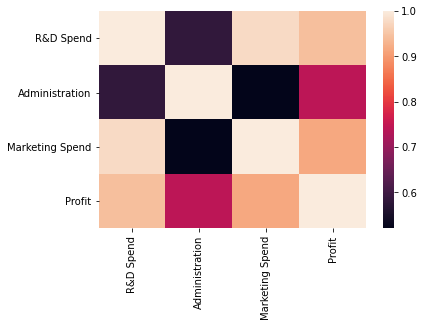

In [30]:
sns.heatmap(companies.corr())

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()

X[:,3] = labelencoder.fit_transform(X[:,3])


In [34]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [35]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [36]:
#Avoid dummy variable trap (colinearity): https://www.youtube.com/watch?v=qrWx3OjZL3o
X = X[:,1:]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = model.predict(X_test)
y_pred

array([ 89790.61532915,  88427.0718736 ,  94894.67836971, 175680.86725612,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050988, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053063,  75316.2814305 ,
       118248.14406603, 164574.40699903, 170937.2898107 , 182069.11645085,
       118845.03252688,  85669.95112228, 180992.59396145,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.07669089,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529206, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.48986819, 158416.46827611,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924518, 174609.08266881,
        93745.66352058,  

In [40]:
model.coef_

array([-8.80536598e+02, -6.98169073e+02,  5.25845857e-01,  8.44390881e-01,
        1.07574255e-01])

In [41]:
model.intercept_

-51035.2297240443

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268861